## Titanic Classification :
Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

## Author : Pathan Mobina Sulthana

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns


## Importing Dataset in to dataframe df

In [95]:
df=pd.read_csv("train.csv")

In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.shape

(891, 12)

## Checking for column list.

In [98]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking for null values.

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Columns with high missing values

In [101]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        p=(df[i].isnull().sum()/df[i].size)*100
        print(i,p)

Age 19.865319865319865
Cabin 77.10437710437711
Embarked 0.22446689113355783


## Here the cabin column is having missing values  avove 50% so we remove that column and in age,embarked columns the misiing values are less than 30% so we need to fill them.

In [102]:
df.drop(["Cabin"],axis=1,inplace=True)

In [103]:
df.drop(["Ticket","Name"],axis=1,inplace=True)

In [104]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## for age column  

<AxesSubplot:xlabel='Age', ylabel='Density'>

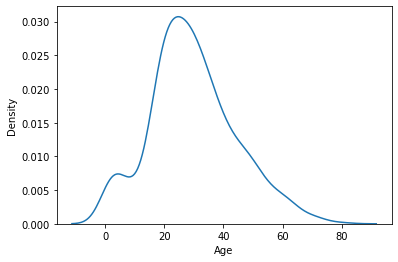

In [105]:
sns.kdeplot(df["Age"])

## here it is slightly skewed so fill with meadian


In [106]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [107]:
df["Age"].isnull().sum()

0

## for Embarked column

## it is categorical column so fill null with mode

In [108]:
df["Embarked"].mode()

0    S
dtype: object

In [109]:
df["Embarked"].fillna('S',inplace=True)

## Handeled all missing values

In [110]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

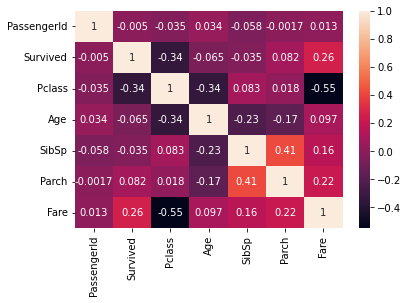

In [111]:
sns.heatmap(df.corr(),annot=True)

## Encoding.

In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [113]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


## Highly correlated columns

In [114]:
cl=[]
for i in df.drop("Survived",axis=1).columns:
    c=df[i].corr(df["Survived"])
    
    if abs(c)>0.1:
        cl.append(i)
        print(i,c)
    

Pclass -0.33848103596101464
Sex -0.5433513806577553
Fare 0.25730652238496227
Embarked -0.16767531386772092


## Vizualising dataset.

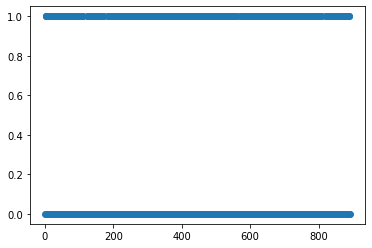

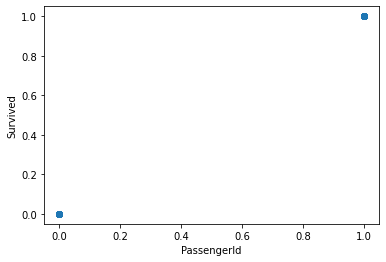

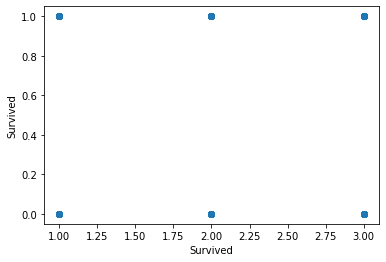

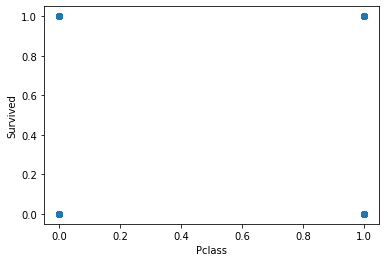

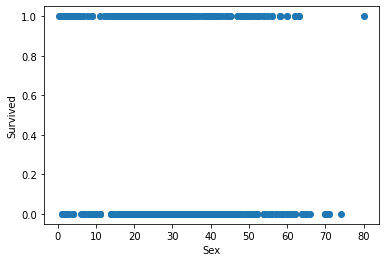

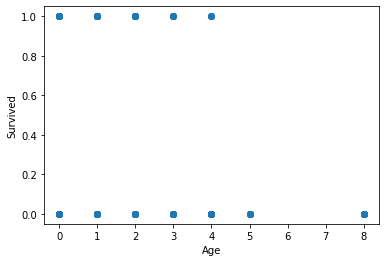

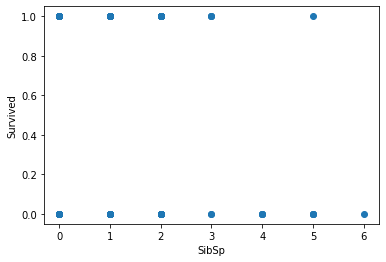

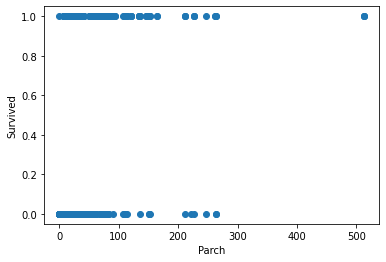

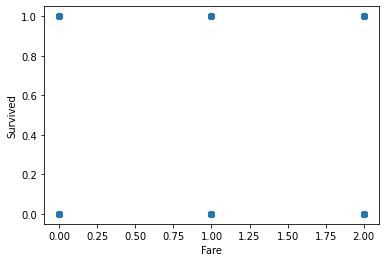

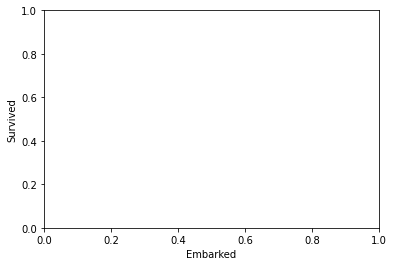

In [115]:
for i in df.columns:
    import matplotlib.pyplot as plt
    plt.scatter(df[i],df["Survived"])
    plt.show()
    plt.xlabel(i)
    plt.ylabel("Survived")

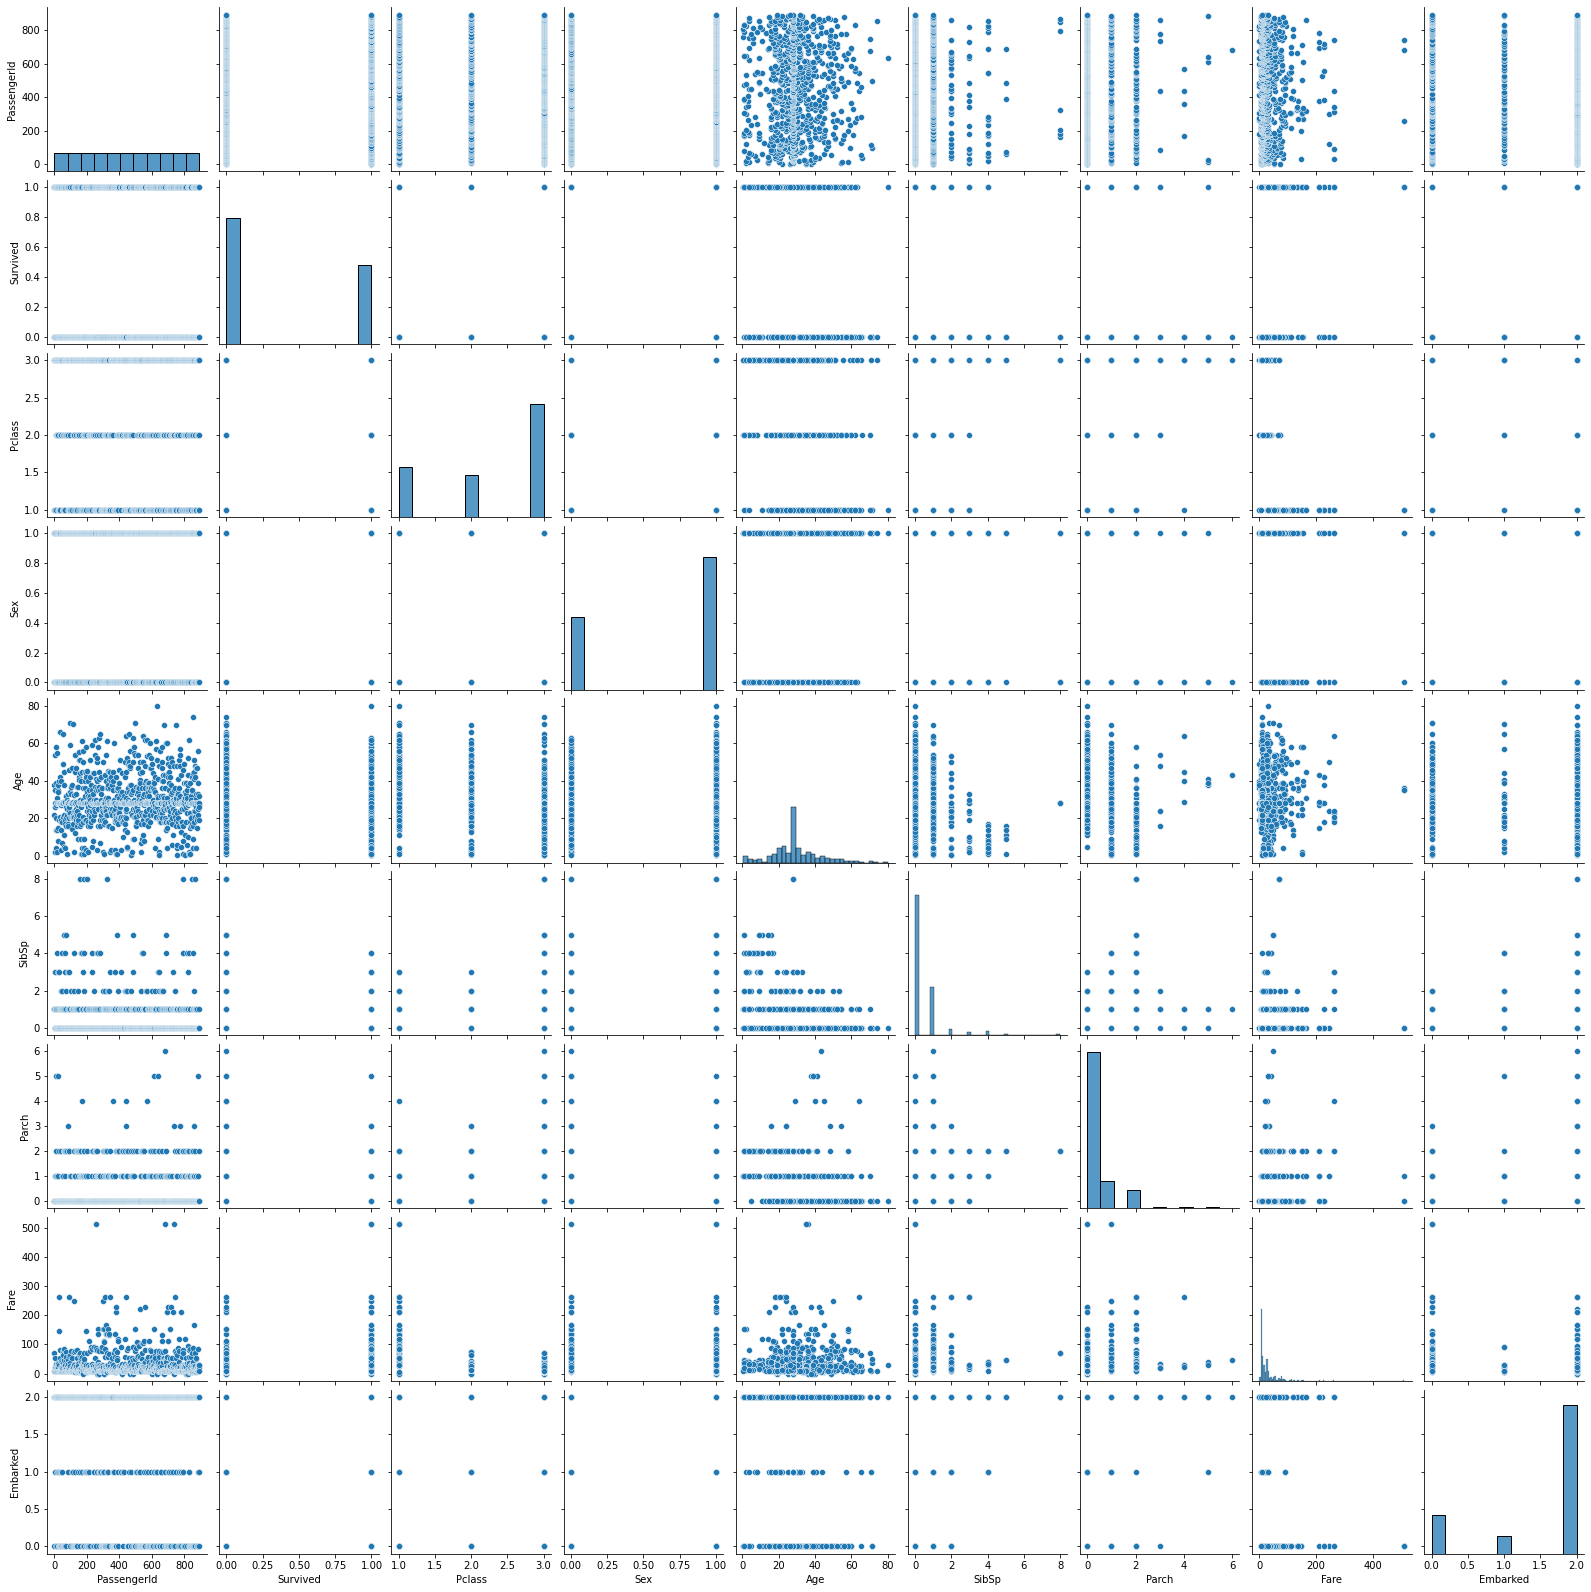

In [116]:
sns.pairplot(df)

In [117]:
df["nage"]=pd.qcut(df["Age"],[0,0.25,0.75,1.0])

<AxesSubplot:xlabel='nage,Survived'>

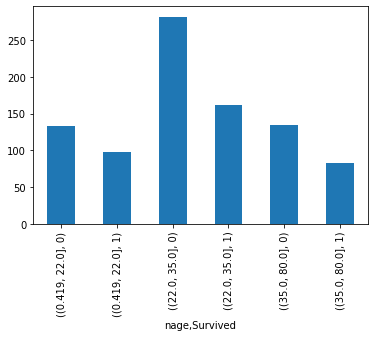

In [118]:
df.groupby(["nage","Survived"])["Survived"].count().plot(kind="bar")

In [119]:
# Divide the age column into three bins
# here np.digitize function devides the age column according to our custom boundrys and return indexes to bins 0-20 is 1 and 20-60 is 2 and 60-80 is 3

df["newage"]= np.digitize(df["Age"], [0,20,60,80])



In [120]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,nage,newage
0,1,0,3,1,22.0,1,0,7.2500,2,"(0.419, 22.0]",2
1,2,1,1,0,38.0,1,0,71.2833,0,"(35.0, 80.0]",2
2,3,1,3,0,26.0,0,0,7.9250,2,"(22.0, 35.0]",2
3,4,1,1,0,35.0,1,0,53.1000,2,"(22.0, 35.0]",2
4,5,0,3,1,35.0,0,0,8.0500,2,"(22.0, 35.0]",2


<AxesSubplot:xlabel='newage,Survived'>

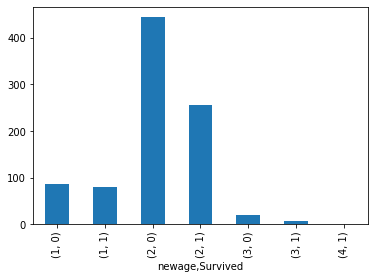

In [121]:
df.groupby(["newage","Survived"])["Survived"].count().plot(kind="bar")

<AxesSubplot:xlabel='Pclass,Survived'>

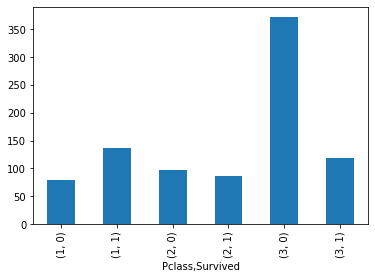

In [122]:
df.groupby(["Pclass","Survived"])["Survived"].count().plot(kind="bar")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

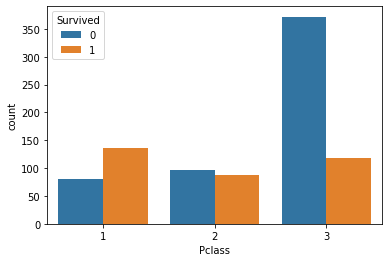

In [123]:
sns.countplot(x=df["Pclass"],hue=df["Survived"])

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [125]:
df.drop("nage",axis=1,inplace=True)

In [126]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,newage
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,2


In [127]:
xtrain,xtest,ytrain,ytest=train_test_split(df[cl],df["Survived"],test_size=0.2,random_state=44)

In [128]:
xtrain

,Pclass,Sex,Fare,Embarked
62,1,1,83.4750,2
847,3,1,7.8958,0
511,3,1,8.0500,2
187,1,1,26.5500,2
833,3,1,7.8542,2
...,...,...,...,...
571,1,0,51.4792,2
173,3,1,7.9250,2
753,3,1,7.8958,2
419,3,0,24.1500,2


In [129]:
ytrain

62     0
847    0
511    0
187    1
833    0
      ..
571    1
173    0
753    0
419    0
788    1
Name: Survived, Length: 712, dtype: int64

In [130]:
xtest

,Pclass,Sex,Fare,Embarked
117,2,1,21.0000,2
143,3,1,6.7500,1
748,1,1,53.1000,2
796,1,0,25.9292,2
853,1,0,39.4000,2
...,...,...,...,...
583,1,1,40.1250,0
530,2,0,26.0000,2
118,1,1,247.5208,0
395,3,1,7.7958,2


In [131]:
ytest

117    0
143    0
748    0
796    1
853    1
      ..
583    0
530    1
118    0
395    0
299    1
Name: Survived, Length: 179, dtype: int64

In [132]:
lr=LogisticRegression()

In [133]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [134]:
ypred=lr.predict(xtest)

In [135]:
ytest

117    0
143    0
748    0
796    1
853    1
      ..
583    0
530    1
118    0
395    0
299    1
Name: Survived, Length: 179, dtype: int64

In [136]:
ypred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1])

## In this way we can tell that a person will sink in water or Survived.

## The factors that decide the people survived or not in this data 